In [1]:
# pip install cufflinks

In [2]:
# pip install lightgbm

In [3]:
# pip install -U imbalanced-learn

In [4]:
# from ipynb.fs.full.TemplateML import *
from ipynb.fs.full.TemplateMLRegression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###############################
import glob
#For ploting 
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')
pd.set_option("display.max_rows", None, "display.max_columns", None)
from nltk import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score,roc_auc_score,roc_curve, auc, f1_score,classification_report 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [5]:
data = pd.read_csv("supermarket_sales.csv")

### Data Analysis

In [6]:
basicanalysis(data)

Shape is:
 (1000, 17)

 Columns are:
 Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

 Types are:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

 Statistical Analysis of Numerical Columns:
         Unit price     Quantity   

In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Univariate Analysis

In [9]:
for col in data.columns:
    print(col)
    print(data[col].unique(),'\n')

Invoice ID
['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-11-3025' '382-03-4

Quantity
[ 7  5  8  6 10  2  3  4  1  9] 

Tax 5%
[26.1415  3.82   16.2155 23.288  30.2085 29.8865 20.652  36.78    3.626
  8.226   2.896   5.102  11.7375 21.595  35.69   28.116  24.1255 21.783
  8.2005  4.03   21.51   13.197   3.32    8.64   13.2945 21.036   1.676
  8.767  22.09   11.2005 23.5325 35.1315 33.512   9.658  19.884   3.406
 15.655  27.396  21.968  12.048   4.336   5.611  20.736  39.48    1.537
 18.792  25.5105  9.0045  5.679  41.315  31.99   11.1475  3.574   0.7715
  1.616  34.392   4.434  35.84   36.175   9.183   3.711  16.719  24.7815
  7.905  15.148   7.935   3.347  29.283  39.385   0.9165 44.74   31.06
  7.278  22.773  33.6015 20.825  22.068  39.155   5.095  29.757  14.502
  7.7    16.072  12.2275 29.071  19.13   17.283   2.1235 23.097   9.476
 22.43    7.693  28.962   4.4875  4.858  43.935   3.735   7.9125 24.81
  2.4355 35.3475 10.3815 17.478  10.6225 44.335   8.214  18.639  15.291
 40.985   1.649  14.7315 25.494  26.1315 36.3555  4.053   5.485   2.568
  5.48    5.34

In [10]:
data['Date'] = pd.to_datetime(data.Date+ " " +data.Time)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
data = data.drop(columns = ['Invoice ID', 'gross margin percentage', 'Time']) # We don't need column ID and feature 'Z_CostContac', 'Z_Revenue' becuase they have only one variable. 
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,30.2085,5.3


In [12]:
data.columns = ['Branch','City', 'Customer_type', 'Gender', 'Product_line', 'Unit_price', 'Quantity', 'Tax', 'Total', "Date", 'Payment', 'cogs', 'Gross_income', "Rating", ]

In [13]:
datem = data['Date']

In [14]:
data['Day_name'] = datem.dt.day_name()
data['Month_name'] = datem.dt.month_name()

In [15]:
data = data.drop(columns = ['Date']) # We don't need column ID and feature 'Z_CostContac', 'Z_Revenue' becuase they have only one variable. 
data.head()

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Payment,cogs,Gross_income,Rating,Day_name,Month_name
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,Saturday,January
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,Friday,March
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,Sunday,March
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,Sunday,January
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,Friday,February


In [16]:
data.dtypes

Branch            object
City              object
Customer_type     object
Gender            object
Product_line      object
Unit_price       float64
Quantity           int64
Tax              float64
Total            float64
Payment           object
cogs             float64
Gross_income     float64
Rating           float64
Day_name          object
Month_name        object
dtype: object

In [17]:
# new_col = [fea for fea in data.columns if fea != 'Response'] # reorder columns to make correlation more prettier
# new_col.append('Response')

# data = data[new_col]
# data.head()

### Exploratory Data Analysis

In [18]:
categorical=[]
numerical = []
for col in data.columns:
    if (data[col].dtype == 'object' or data[col].nunique() == 2):
        print(col,'\n',data[col].value_counts(),'\n')
        categorical.append(col)
    else:
        numerical.append(col)

Branch 
 A    340
B    332
C    328
Name: Branch, dtype: int64 

City 
 Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Customer_type 
 Member    501
Normal    499
Name: Customer_type, dtype: int64 

Gender 
 Female    501
Male      499
Name: Gender, dtype: int64 

Product_line 
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64 

Payment 
 Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

Day_name 
 Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: Day_name, dtype: int64 

Month_name 
 January     352
March       345
February    303
Name: Month_name, dtype: int64 



In [19]:
print(categorical)
print(numerical)
print(len(categorical))
print(len(numerical))

['Branch', 'City', 'Customer_type', 'Gender', 'Product_line', 'Payment', 'Day_name', 'Month_name']
['Unit_price', 'Quantity', 'Tax', 'Total', 'cogs', 'Gross_income', 'Rating']
8
7


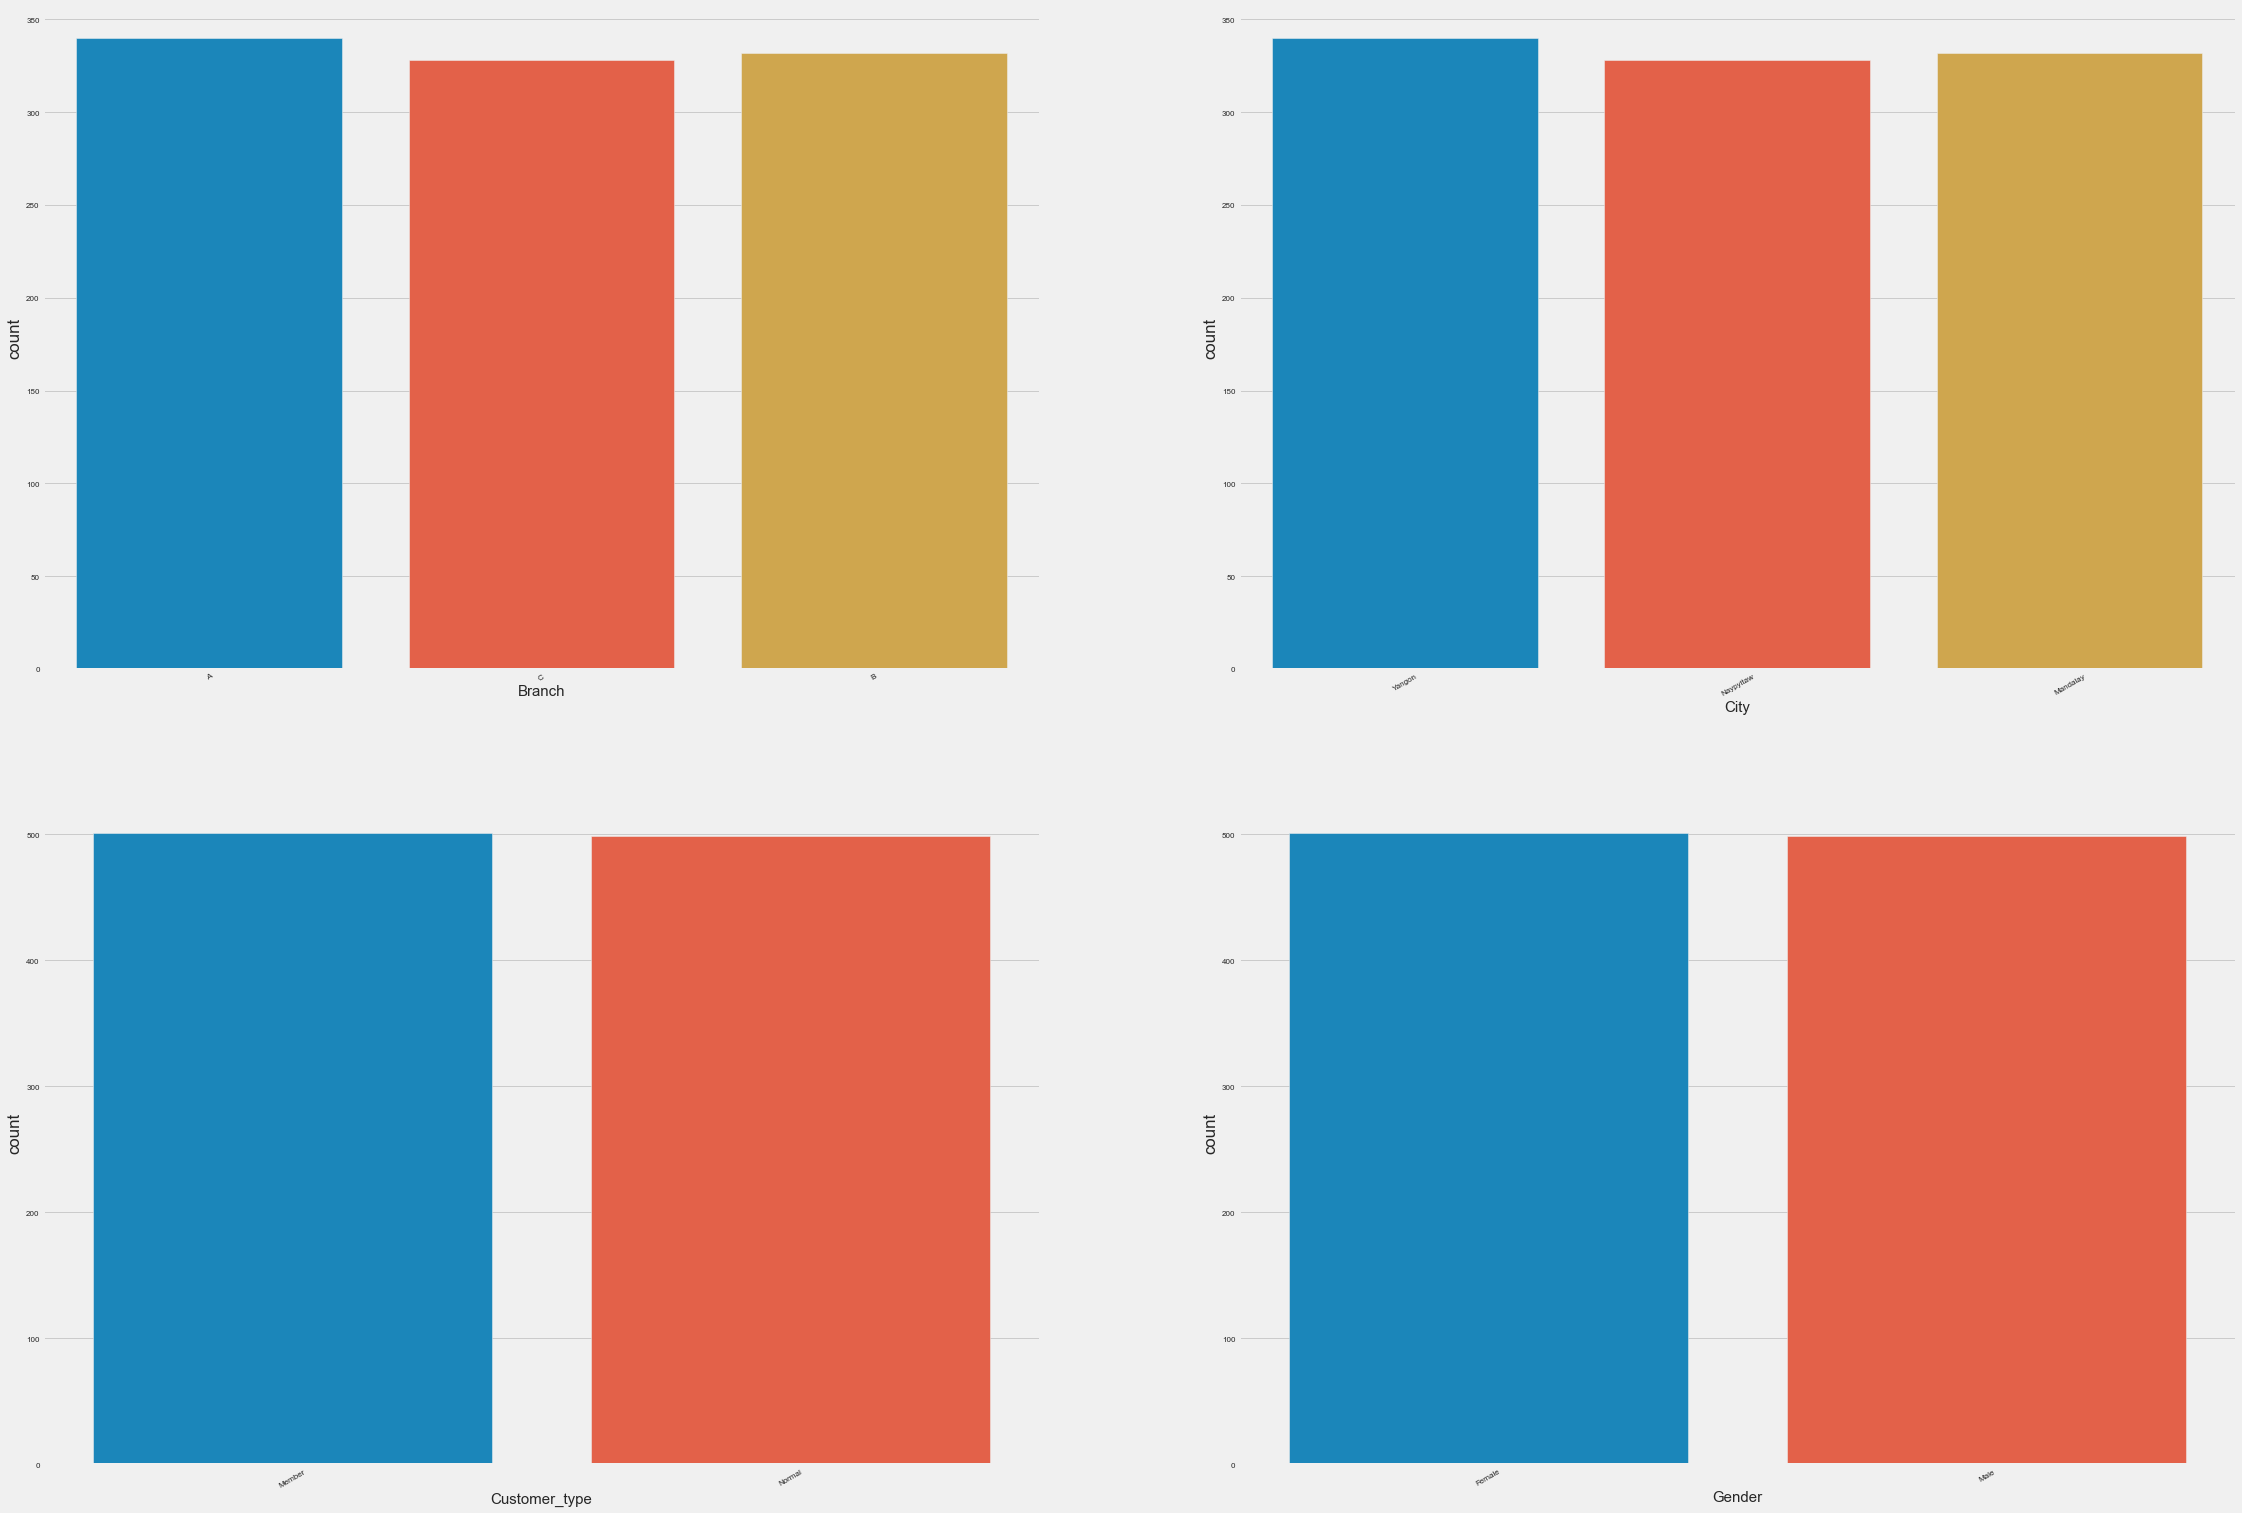

In [20]:
fig = plt.figure(figsize = (35,25))
axes = 220
lst=categorical
for cat in lst[0:4]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =data, x = cat)
    plt.xlabel(cat,fontsize=15)
    plt.xticks(rotation=30)
plt.show()

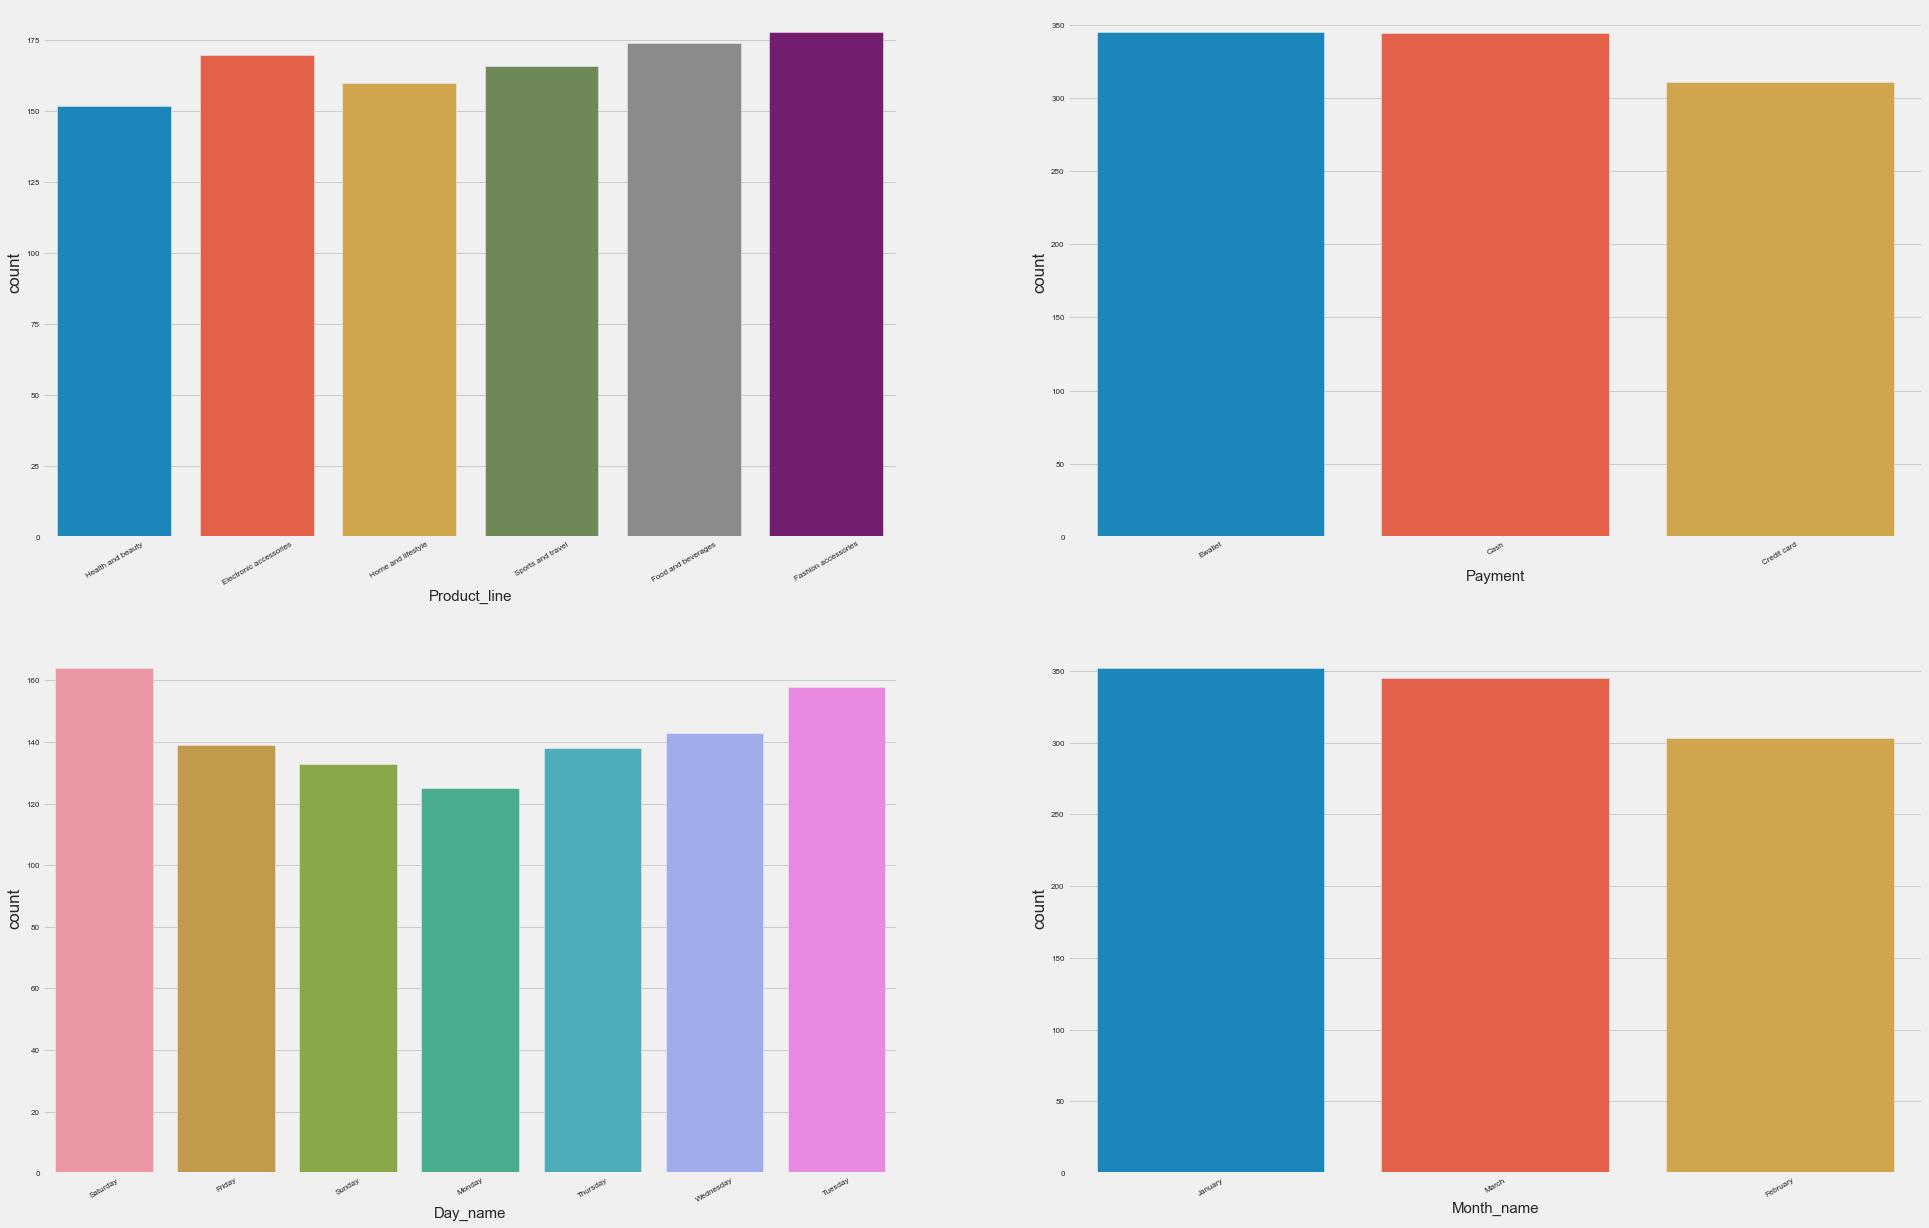

In [21]:
fig = plt.figure(figsize = (30,20))
axes = 220
lst=categorical
for cat in lst[4:8]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =data, x = cat)
    plt.xlabel(cat,fontsize=15)
    plt.xticks(rotation=30)
plt.show()

### Numerical Analysis

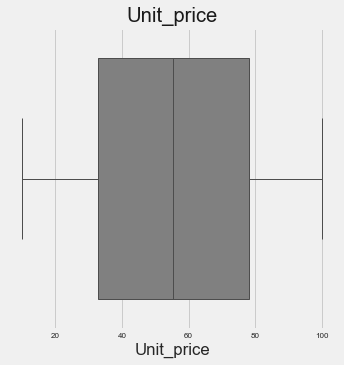

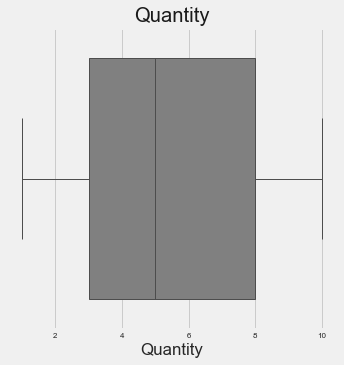

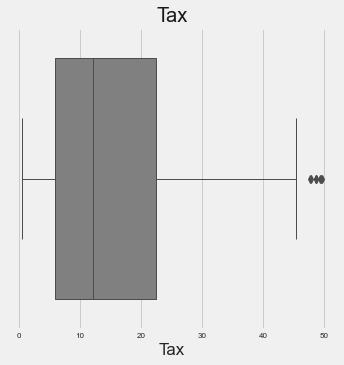

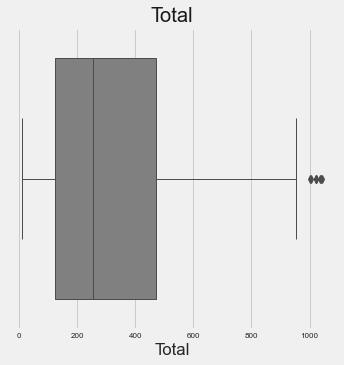

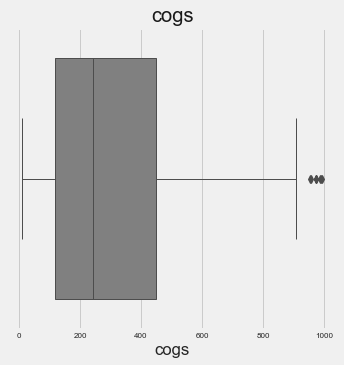

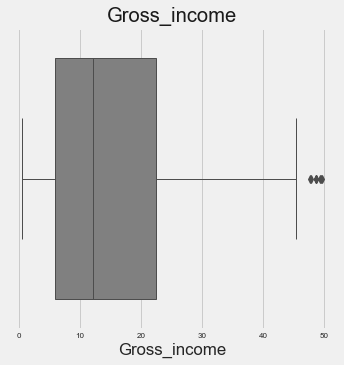

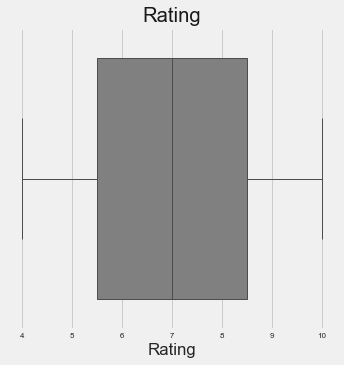

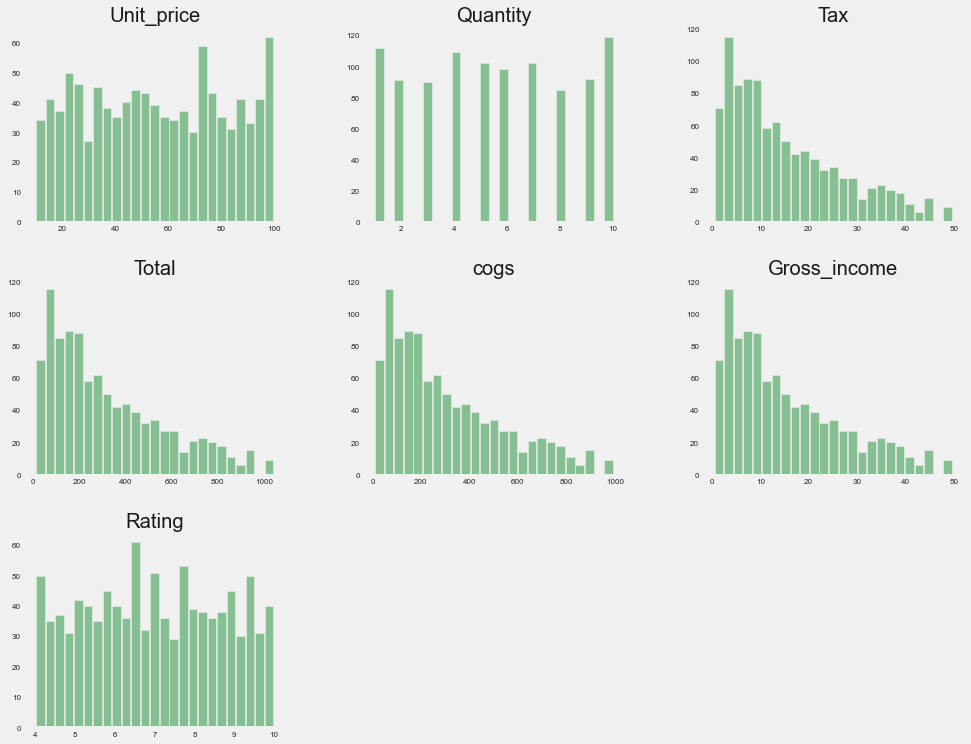

In [22]:
numcolanalysis(data)

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit_price, dtype: float64
count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64
count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax, dtype: float64
count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64
count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64
count    1000.000000
me

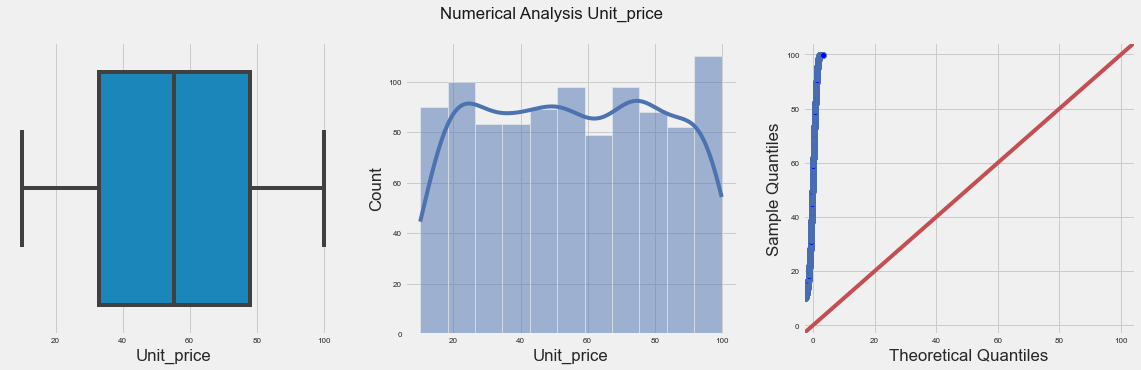

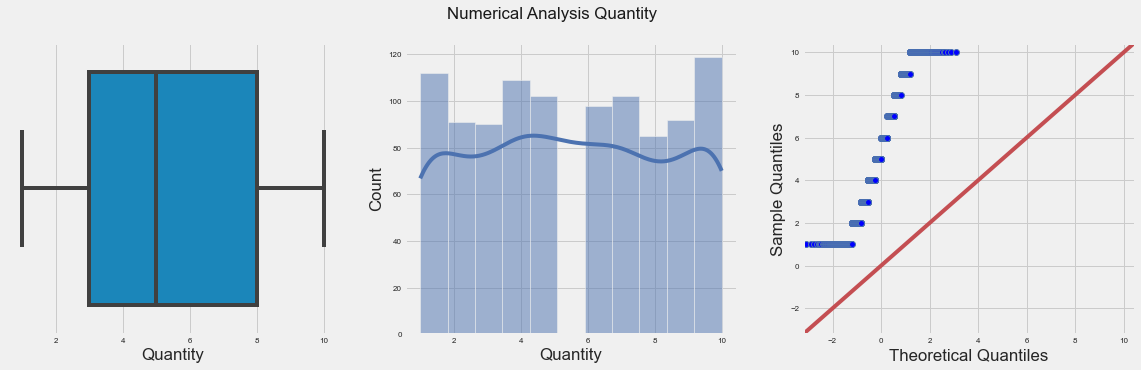

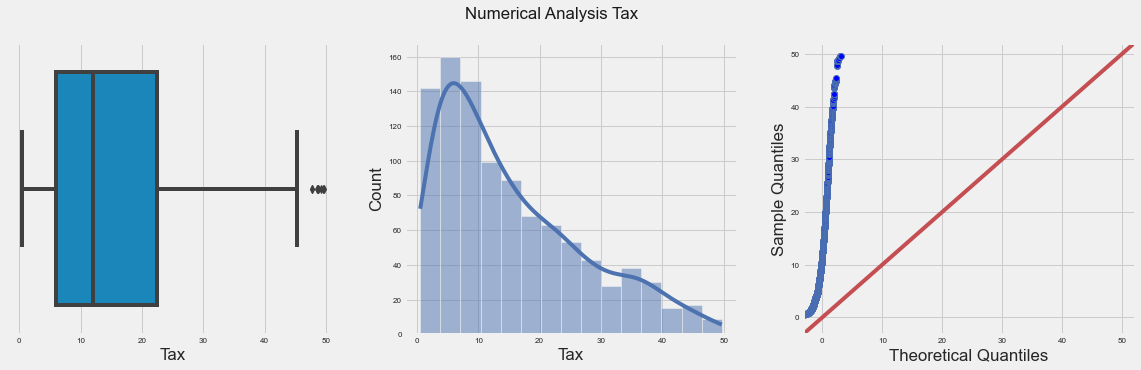

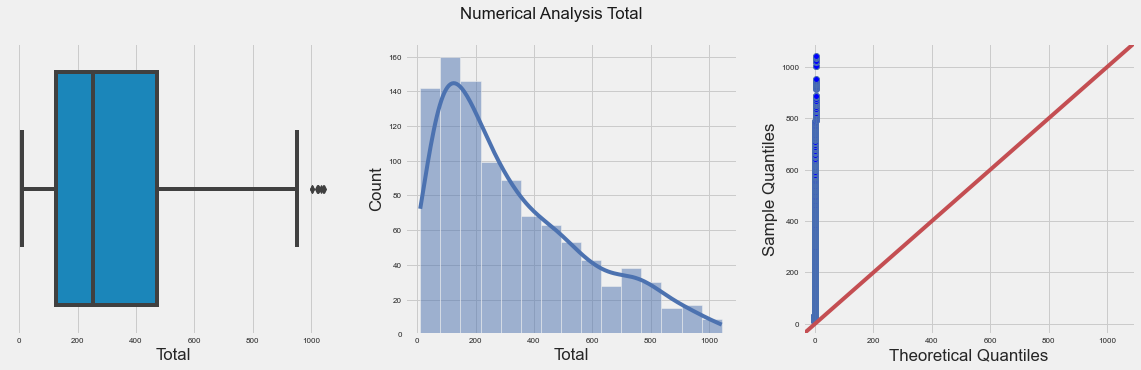

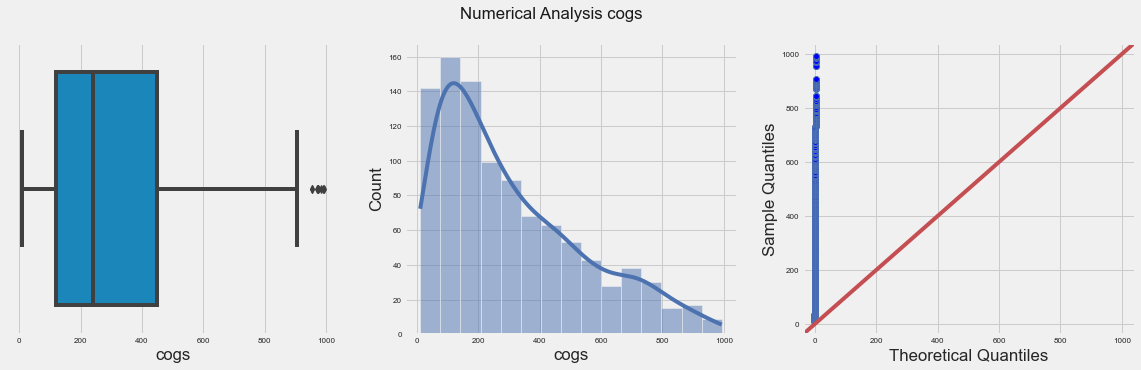

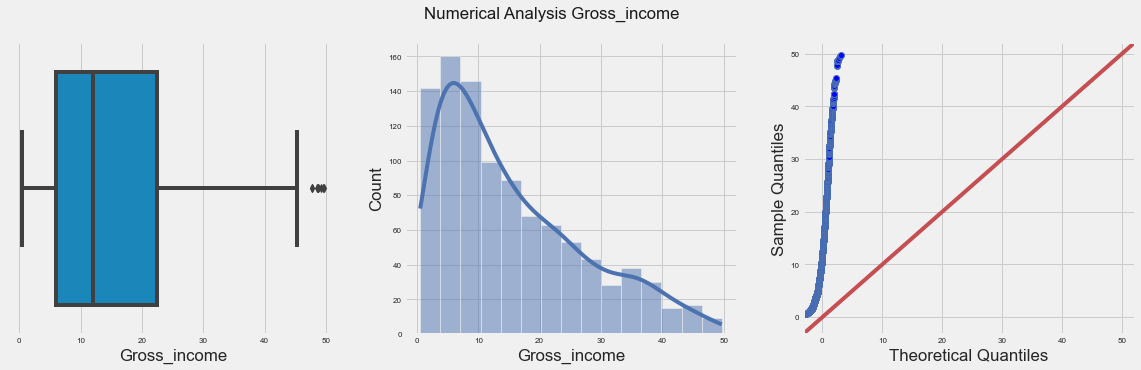

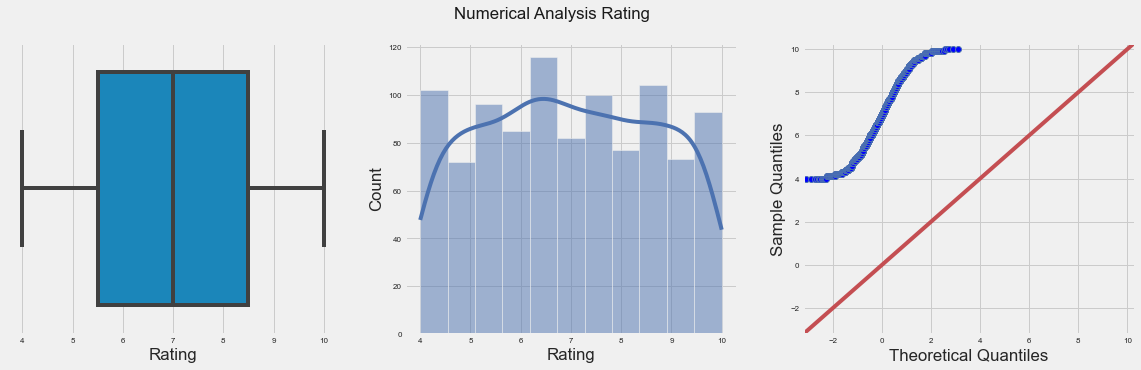

In [23]:
for i in numerical:
    num_plots (data,i)

### Correlation

<AxesSubplot:>

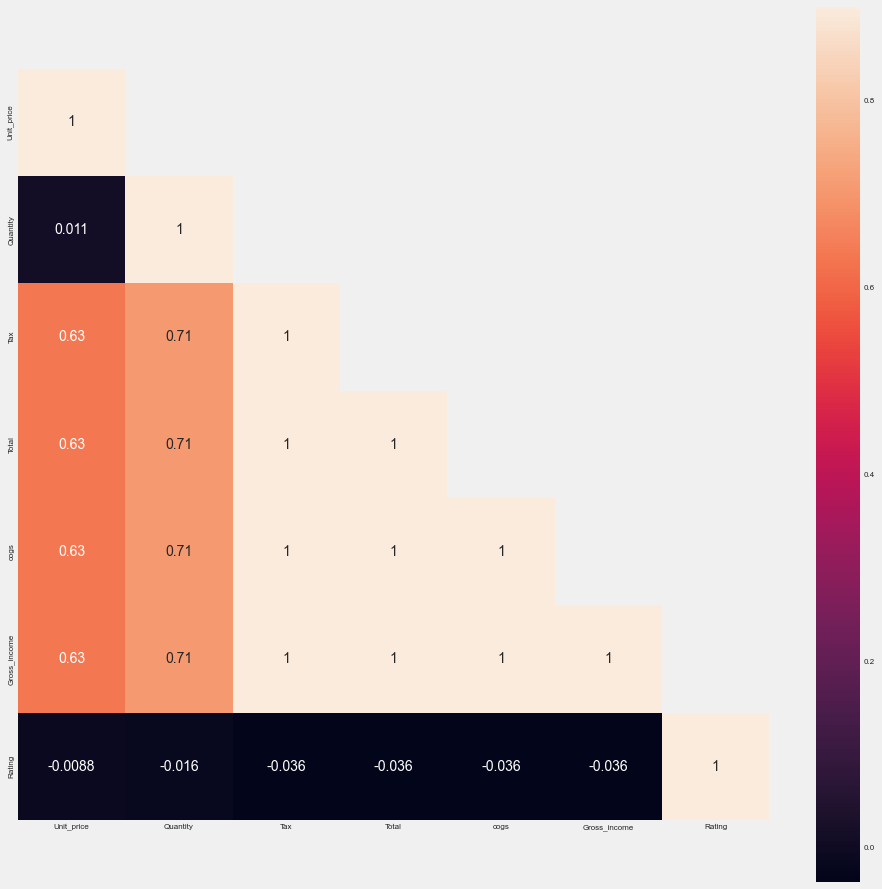

In [24]:
#create correlation
corr = data.corr(method ='pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,15))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [25]:
categorical

['Branch',
 'City',
 'Customer_type',
 'Gender',
 'Product_line',
 'Payment',
 'Day_name',
 'Month_name']

### Analysis by total amount of sales

We will see the avg total amount by features.

Branch

City

Customer_type

Gender

Product_line

Payment

Day_name

Month_name

### Branch

In [26]:
data.groupby('Branch')['Total'].mean().sort_values(ascending = False)

Branch
C    337.099715
B    319.872506
A    312.354031
Name: Total, dtype: float64

### City

In [27]:
data.groupby('City')['Total'].mean().sort_values(ascending = False)

City
Naypyitaw    337.099715
Mandalay     319.872506
Yangon       312.354031
Name: Total, dtype: float64

### Gender

In [28]:
data.groupby('Gender')['Total'].mean().sort_values(ascending = False)

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

avg amount is higher in sales by Females than Males.

### Product_line

In [29]:
data.groupby('Product_line')['Total'].mean().sort_values(ascending = False)

Product_line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64

### Payment

In [30]:
data.groupby('Payment')['Total'].mean().sort_values(ascending = False)

Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
Name: Total, dtype: float64

### Day_name

In [31]:
data.groupby('Day_name')['Total'].mean().sort_values(ascending = False)

Day_name
Saturday     342.200058
Sunday       334.269868
Thursday     328.617739
Tuesday      325.836997
Friday       316.016838
Wednesday    305.812133
Monday       303.192624
Name: Total, dtype: float64

The above result shows that on weekends people spend more than weekdays

### Month_name

In [32]:
data.groupby('Month_name')['Total'].mean().sort_values(ascending = False)

Month_name
January     330.374625
February    320.856020
March       317.262339
Name: Total, dtype: float64

Response rate is more higher in 0, 9, 10, 11 deal purchases. But in 12, 13, 15 deal purchases group never response to marketing campiagn. So we need to make strategy for lower deal purchase and highest deal purchase groups.

### Bivariate Analysis

<Figure size 1080x576 with 0 Axes>

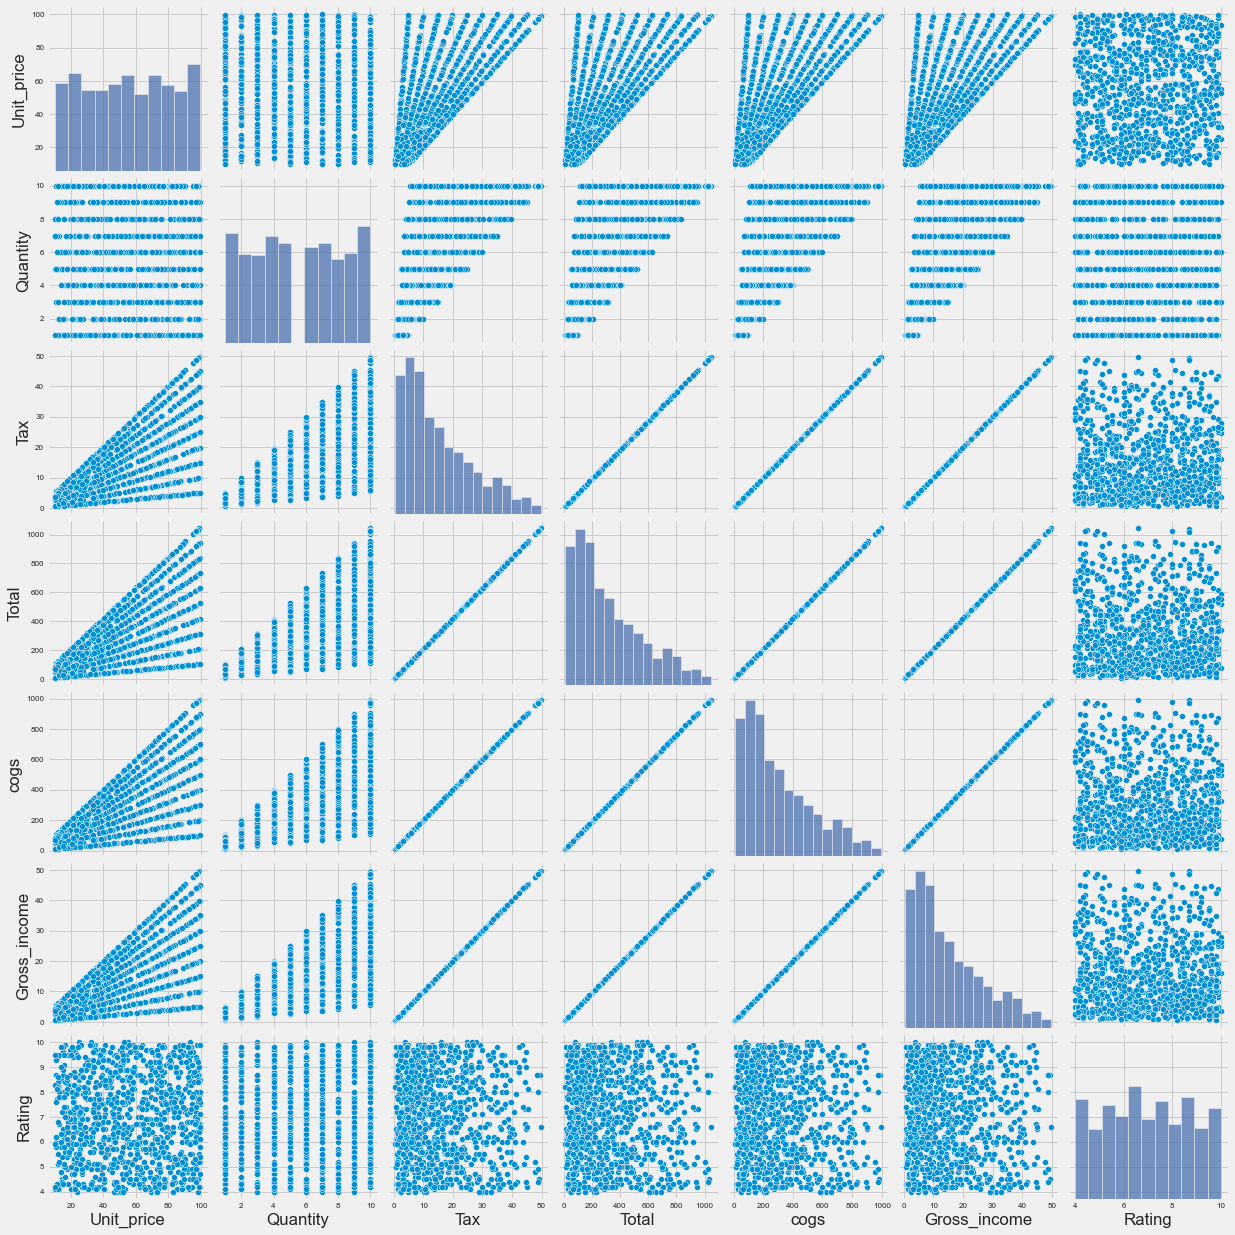

In [33]:
plt.figure(figsize=(15,8))
# numerical.append('Response')
sns.pairplot(data[numerical])

### Feature Selection & Importance 

In [34]:
data.dtypes

Branch            object
City              object
Customer_type     object
Gender            object
Product_line      object
Unit_price       float64
Quantity           int64
Tax              float64
Total            float64
Payment           object
cogs             float64
Gross_income     float64
Rating           float64
Day_name          object
Month_name        object
dtype: object

In [35]:
categorical

['Branch',
 'City',
 'Customer_type',
 'Gender',
 'Product_line',
 'Payment',
 'Day_name',
 'Month_name']

### Encoding 

In [36]:
df = apply_label_encoding(data, cols=categorical)
df

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Payment,cogs,Gross_income,Rating,Day_name,Month_name
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1,2,1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6,0,2
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4,3,2
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4,3,1
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3,0,0
5,2,1,1,1,0,85.39,7,29.8865,627.6165,2,597.73,29.8865,4.1,1,2
6,0,2,0,0,0,68.84,6,20.6520,433.6920,2,413.04,20.6520,5.8,1,0
7,2,1,1,0,4,73.56,10,36.7800,772.3800,2,735.60,36.7800,8.0,3,0
8,0,2,0,0,3,36.26,2,3.6260,76.1460,1,72.52,3.6260,7.2,4,1
9,1,0,0,0,2,54.84,3,8.2260,172.7460,1,164.52,8.2260,5.9,6,0


### Feature Selection

In [37]:
# x,y = XYsplit(df, 'Total')
X, trainX, testX, trainY, testY = traintestsplit(df,0.30,random=42, label_col='Rating')

In [38]:
testX.shape

(300, 14)

In [39]:
imp_result = RFfeatureimportance(X, trainX, testX, trainY, testY, trees=35, random=None, regression=True)

Unit_price       24.218802
Day_name          9.595838
Product_line      8.703399
Gross_income      7.952061
cogs              7.680620
Tax               7.378434
Total             7.097044
Quantity          5.542272
Payment           5.086453
Month_name        4.828322
Gender            3.210480
City              3.166762
Branch            2.883359
Customer_type     2.656154
dtype: float64


In [40]:
impFeatures = pd.DataFrame(imp_result).reset_index()
impFeatures.columns = ['features', 'score']


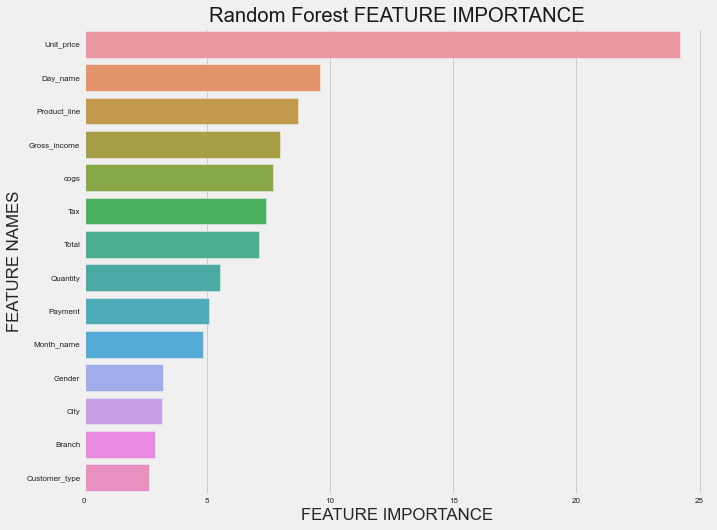

In [41]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(impFeatures['score'],impFeatures['features'], 'Random Forest')

### Applying ML Models

In [42]:
#Applying Linear Regression 
LinearReg(trainX, testX, trainY, testY)

R-Squared Value:  -0.04983302384953259
Adjusted R-Squared:  -0.10140376888073765
RMSE:  1.7661758535831569


{'r2': -0.04983302384953259,
 'r2_adjusted': -0.10140376888073765,
 'rmse': 1.7661758535831569,
 'model_obj': LinearRegression()}

In [43]:
#Applying Random Forest Regressor
RandomForestReg(trainX, testX, trainY, testY)

R-Squared Value:  -0.09999052568358291
Adjusted R-Squared:  -0.15402514799786426
RMSE:  1.8078745882020315


{'r2': -0.09999052568358291,
 'r2_adjusted': -0.15402514799786426,
 'rmse': 1.8078745882020315,
 'model_obj': RandomForestRegressor()}

In [44]:
#Applying Polynomial Regression 
PolynomialReg(trainX, testX, trainY, testY, degree=3)

R-Squared Value:  -0.7454990166652493
Adjusted R-Squared:  2.3698273122911013
RMSE:  2.2773701935050554


{'r2': -0.7454990166652493,
 'r2_adjusted': 2.3698273122911013,
 'rmse': 2.2773701935050554,
 'model_obj': LinearRegression()}

In [45]:
# Applying Support Vector Regression
SupportVectorRegression(trainX, testX, trainY, testY)

R-Squared Value:  -0.014413181999594515
Adjusted R-Squared:  -0.06424400497501304
RMSE:  1.7361261158879775


{'r2': -0.014413181999594515,
 'r2_adjusted': -0.06424400497501304,
 'rmse': 1.7361261158879775,
 'model_obj': SVR()}

In [46]:
#Applying Decision Tree Regressor
DecisionTreeReg(trainX, testX, trainY, testY)

R-Squared Value:  -1.041323291565095
Adjusted R-Squared:  -1.1415988216770643
RMSE:  2.462803280816395


{'r2': -1.041323291565095,
 'r2_adjusted': -1.1415988216770643,
 'rmse': 2.462803280816395,
 'model_obj': DecisionTreeRegressor()}

In [47]:
#Applying Gradient Boosting Regressor
GradientBoostingReg(trainX, testX, trainY, testY)

R-Squared Value:  -0.09733240122767683
Adjusted R-Squared:  -0.15123644900728217
RMSE:  1.8056889046846312


{'r2': -0.09733240122767683,
 'r2_adjusted': -0.15123644900728217,
 'rmse': 1.8056889046846312,
 'model_obj': GradientBoostingRegressor()}